In [60]:
import pandas as pd 
import numpy as np 
from pandas.tseries.offsets import DateOffset
import seaborn as sns 
import matplotlib.pyplot as plt 
import re 

In [61]:
df=pd.read_csv("data/CleanedKaggle/financial_loan_cleaned.csv") 

In [62]:
df 

,address_state,emp_title,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,purpose,verification_status,...,last_credit_pull_weekday,last_payment_year,last_payment_month,last_payment_day,last_payment_weekday,next_payment_year,next_payment_month,next_payment_day,next_payment_weekday,term_months
0,GA,Other,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,car,Source Verified,...,0,2021,4,13,1,2021,5,13,3,60
1,CA,Other,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,car,Source Verified,...,1,2021,1,15,4,2021,2,15,0,36
2,CA,Other,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,car,Not Verified,...,6,2021,1,9,5,2021,2,9,1,36
3,TX,Other,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,car,Source Verified,...,6,2021,3,12,4,2021,4,12,0,60
4,IL,Other,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,car,Verified,...,1,2021,1,15,4,2021,2,15,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,NJ,Other,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,Current,16-06-2021,wedding,Verified,...,6,2021,5,16,6,2021,6,16,2,60
38572,NY,Other,RENT,11-10-2021,16-04-2021,16-05-2021,Current,16-06-2021,wedding,Verified,...,4,2021,5,16,6,2021,6,16,2,60
38573,CA,Other,RENT,11-09-2021,16-05-2021,16-05-2021,Current,16-06-2021,wedding,Verified,...,6,2021,5,16,6,2021,6,16,2,60
38574,NY,Other,RENT,11-10-2021,16-05-2021,16-05-2021,Current,16-06-2021,wedding,Verified,...,6,2021,5,16,6,2021,6,16,2,60


## States 

In [63]:
df['address_state'].unique().shape

(50,)

In [64]:
northeast = ["CT","ME","MA","NH","NJ","NY","PA","RI","VT"]
midwest   = ["IL","IN","IA","KS","MI","MN","MO","NE","ND","OH","SD","WI"]
south     = ["AL","AR","DE","FL","GA","KY","LA","MD","MS","NC","OK","SC","TN","TX","VA","WV"]
west      = ["AK","AZ","CA","CO","HI","ID","MT","NV","NM","OR","UT","WA","WY"]
north_south = {
    "North": northeast + midwest + west,
    "South": south
}
east_mid_west = {
    "East": northeast + south,
    "Middle": midwest,
    "West": west
}

def north_south_apply(x,north_south): 
    if x in north_south['North']:
        return "North" 
    else:
        return "South" 
        
def east_mid_west_apply(x,east_mid_west): 
    if x in east_mid_west['East']:
        return "East" 
    elif x in east_mid_west['Middle']:
        return 'Middle'
    else:
        return "West" 


In [65]:
df['north_south_address']=df['address_state'].apply(lambda x: north_south_apply(x,north_south))
df['east_mid_west_address']=df['address_state'].apply(lambda x: east_mid_west_apply(x,east_mid_west))
df['clustered_address']=df['north_south_address']+df['east_mid_west_address']

## Purpose 

In [66]:
df['purpose'].unique() 

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

In [67]:
def purpose_clutsering(x): 
    # to discuss
    life=['car','home','home improvement','house','medical','moving','vacation', 'wedding','major purchase', 
         'renewable_energ']
    finance=['credit card','Debt consolidation','small business']
    if x in life: 
        return 'life' 
    elif x in finance: 
        return 'finance' 
    else: 
        return 'Other'

In [68]:
df['purpose_clustered']=df['purpose'].apply(purpose_clutsering)

## Date 

In [69]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'], format='%d-%m-%Y')
df['daysdiff_issue_pull'] = (df['issue_date'] - df['last_credit_pull_date']).dt.days
df['pull_after_issue']=np.where(df['daysdiff_issue_pull']>0,1,0) 

In [70]:
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'], format='%d-%m-%Y')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format='%d-%m-%Y')
df['last_next_diff']=(df['next_payment_date']-df['last_payment_date']).dt.days 


In [71]:
df['loan_status'].unique() 

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [72]:
def date_fixer(x,y): 
    if x=='Fully Paid':
        return 0 
    else: 
        return y

In [73]:
df['last_next_diff'] = df.apply(
    lambda row: date_fixer(row['loan_status'],
                                     row['last_next_diff']),
    axis=1
)

In [74]:
# Hmmm 
df['last_next_diff'].unique() 

array([30,  0, 31, 28])

In [75]:
df['end_date'] = df.apply(
    lambda row: row['issue_date'] + DateOffset(months=row['term_months']),
    axis=1
)
df['time_to_last_payment']=(df['end_date']-df['next_payment_date']).dt.days 

df['time_to_last_payment'] = df.apply(
    lambda row: date_fixer(row['loan_status'],
                                     row['time_to_last_payment']),
    axis=1
)

## Numeric 

<Axes: xlabel='loan_amount', ylabel='Density'>

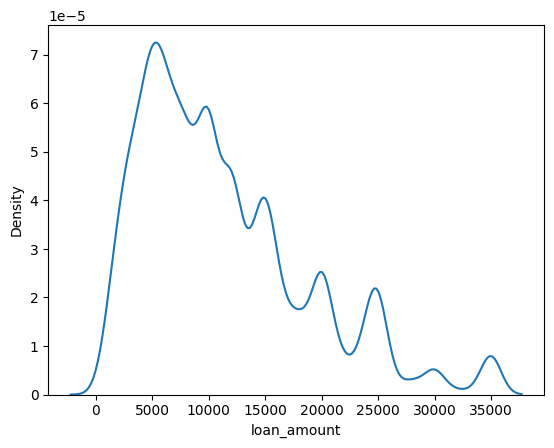

In [76]:
sns.kdeplot(data=df,x='loan_amount') 

<Axes: xlabel='log_loan_amount', ylabel='Density'>

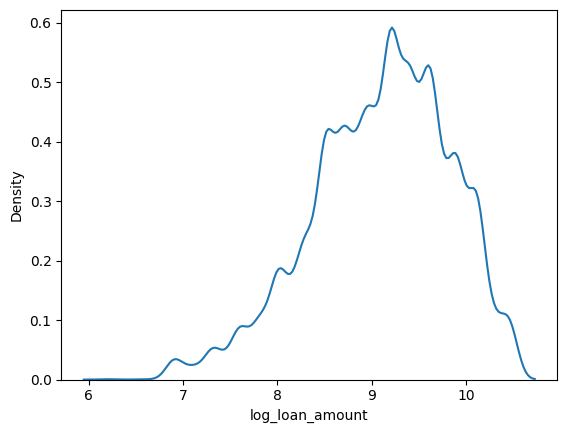

In [77]:
df['log_loan_amount']=np.log(df['loan_amount']) 
sns.kdeplot(data=df,x='log_loan_amount') 

## Jobs

In [78]:
df['emp_title'].value_counts()[50:200]

emp_title
Columbia University                21
American Express                   21
Department of Homeland Security    21
PricewaterhouseCoopers             20
Department of Veterans Affairs     20
                                   ..
Charles Schwab                     10
Yale University                    10
URS Corporation                    10
Costco                             10
Rite Aid                           10
Name: count, Length: 119, dtype: int64

In [79]:

categories = {
    "Tech/Telecom": [r"tech", r"software", r"information", r"it", r"comcast", r"verizon", r"at[\\s&]*t", r"accenture", r"saic", r"northrop", r"lockheed", r"booz", r"sprint", r"intel", r"microsoft", r"apple", r"google", r"oracle", r"cisco", r"ibm", r"hp", r"dell", r"digital", r"data"],
    "Finance": [r"bank", r"finance", r"financial", r"fidelity", r"tiaa", r"credit", r"invest", r"citigroup", r"wells", r"chase", r"hartford", r"visa", r"mastercard", r"capital [oO]ne", r"goldman", r"morgan", r"accountant", r"cpa", r"auditor", r"insurance"],
    "Military": [r"air force", r"\\barmy\\b", r"\\bnavy\\b", r"\\bmarine", r"usaf", r"u\\.s\\.\\s*army", r"u\\.s\\.\\s*navy", r"u\\.s\\.\\s*air", r"coast guard", r"military", r"department of defense", r"\\bdod\\b"],
    "Education": [r"school", r"university", r"college", r"district", r"teacher", r"professor", r"education", r"institute"],
    "Healthcare": [r"hospital", r"health", r"kaiser", r"medical", r"clinic", r"pharma", r"nurse", r"doctor", r"healthcare", r"patient"],
    "Retail/Hospitality": [r"walmart", r"costco", r"target", r"home depot", r"lowe", r"walgreens", r"macy", r"starbucks", r"marriott", r"hotel", r"restaurant", r"amazon", r"retail", r"grocery"],
    "Transportation/Logistics": [r"airline", r"aviation", r"faa", r"airport", r"transport", r"logistics", r"freight", r"ups", r"fedex", r"truck", r"usps", r"postal service"],
    "Government/Civil Service": [r"federal", r"department of", r"\\bcity of\\b", r"\\bcounty\\b", r"government", r"homeland", r"irs", r"public", r"state of", r"court", r"postal"],
    "Consulting/Professional Services": [r"consult", r"advisor", r"bain", r"mckinsey", r"deloitte", r"pwc", r"pricewaterhouse", r"ey", r"kpmg", r"booz allen"],
    "Self-Employed": [r"\\bself\\b", r"self[-\\s]?employed", r"freelance", r"owner", r"proprietor", r"entrepreneur"],
    "Manufacturing/Engineering": [r"engineering", r"engineer", r"mfg", r"manufacturing", r"plant", r"production", r"automotive", r"boeing"],
    "Energy/Utilities": [r"energy", r"utility", r"power", r"electric", r"gas", r"oil", r"solar"],
    "Legal/Law": [r"law", r"legal", r"attorney", r"lawyer", r"paralegal"],
}
def classify(title):
    t = title.lower()
    for cat, patterns in categories.items():
        for p in patterns:
            if re.search(p, t):
                return cat
    return "Other"

df["emp_category"] = df["emp_title"].apply(classify)

In [80]:
df["emp_category"].value_counts() 

emp_category
Other                               34580
Tech/Telecom                         2417
Finance                               530
Retail/Hospitality                    302
Transportation/Logistics              217
Military                              180
Government/Civil Service              136
Healthcare                             56
Education                              46
Manufacturing/Engineering              31
Consulting/Professional Services       30
Self-Employed                          28
Energy/Utilities                       23
Name: count, dtype: int64

In [81]:
df.to_csv("data/FeatureEngineerKaggle/feature_engineer_financial_loan.csv")